In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('ENB2012_data.csv')

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df.shape

(768, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [6]:
df.describe(include='all')

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [7]:
def MissingUniqueStatistics(df):
  
    total_entry_list = []
    total_missing_value_list = []
    missing_value_ratio_list = []
    data_type_list = []
    unique_values_list = []
    number_of_unique_values_list = []
    variable_name_list = []
  
    for col in df.columns:

        variable_name_list.append(col)
        missing_value_ratio = round((df[col].isna().sum()/len(df[col])),4)
        total_entry_list.append(df[col].shape[0] - df[col].isna().sum())
        total_missing_value_list.append(df[col].isna().sum())
        missing_value_ratio_list.append(missing_value_ratio)
        data_type_list.append(df[col].dtype)
        unique_values_list.append(list(df[col].unique()))
        number_of_unique_values_list.append(len(df[col].unique()))

    data_info_df = pd.DataFrame({'Variable':variable_name_list,'#_Total_Entry':total_entry_list,\
                           '#_Missing_Value':total_missing_value_list,'%_Missing_Value':missing_value_ratio_list,\
                           'Data_Type':data_type_list,'Unique_Values':unique_values_list,\
                           '#_Uniques_Values':number_of_unique_values_list})
  
    return data_info_df.sort_values(by="#_Missing_Value",ascending=False)

In [8]:
data_info = MissingUniqueStatistics(df)
data_info

,Variable,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Uniques_Values
0,X1,768,0,0.0,float64,"[0.98, 0.9, 0.86, 0.82, 0.79, 0.76, 0.74, 0.71...",12
1,X2,768,0,0.0,float64,"[514.5, 563.5, 588.0, 612.5, 637.0, 661.5, 686...",12
2,X3,768,0,0.0,float64,"[294.0, 318.5, 343.0, 416.5, 245.0, 269.5, 367.5]",7
3,X4,768,0,0.0,float64,"[110.25, 122.5, 147.0, 220.5]",4
4,X5,768,0,0.0,float64,"[7.0, 3.5]",2
5,X6,768,0,0.0,int64,"[2, 3, 4, 5]",4
6,X7,768,0,0.0,float64,"[0.0, 0.1, 0.25, 0.4]",4
7,X8,768,0,0.0,int64,"[0, 1, 2, 3, 4, 5]",6
8,Y1,768,0,0.0,float64,"[15.55, 20.84, 21.46, 20.71, 19.68, 19.5, 19.9...",586
9,Y2,768,0,0.0,float64,"[21.33, 28.28, 25.38, 25.16, 29.6, 27.3, 21.97...",636


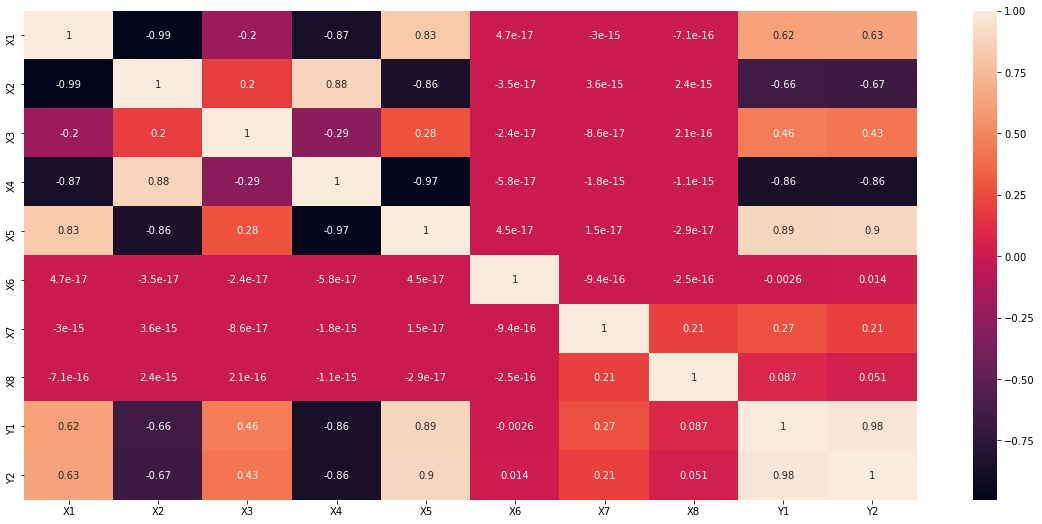

In [9]:
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(df.corr(), annot=True)
plt.show()

## train / test split

## Heating Load

In [10]:
y = df.loc[:,"Y1"]

In [11]:
x = df.iloc[:,0:8]

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.33,random_state=42)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((514, 8), (514,), (254, 8), (254,))

In [30]:
df_rmse = pd.DataFrame(columns=['RMSE'])

In [31]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, Y_train)

y_pred = linreg.predict(X_test)

rmse_metric = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
df_rmse.loc['Linear_regression'] = [rmse_metric]
rmse_metric

2.97484023814066

In [32]:
from sklearn import metrics
from sklearn import tree

dt = tree.DecisionTreeRegressor()
dt.fit(X_train, Y_train)

y_pred = dt.predict(X_test)

rmse_metric = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
df_rmse.loc['Decision_tree'] = [rmse_metric]
rmse_metric

0.5934139849045649

In [33]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

y_pred = rf.predict(X_test)

rmse_metric = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
df_rmse.loc['Random_Forest'] = [rmse_metric]
rmse_metric

0.486751492481605

In [34]:
from sklearn import metrics
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, Y_train)

y_pred = svr.predict(X_test)

rmse_metric = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
df_rmse.loc['Support_Vector'] = [rmse_metric]
rmse_metric

5.848963456136399

In [35]:
from sklearn import metrics
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor()
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

rmse_metric = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
df_rmse.loc['Nearest_Neighbors'] = [rmse_metric]
rmse_metric

2.4753662737010007

In [36]:
import xgboost as xgb

extreme_gradient = xgb.XGBRegressor()
extreme_gradient.fit(X_train, Y_train)

y_pred = extreme_gradient.predict(X_test)

rmse_metric = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
df_rmse.loc['XGBoost'] = [rmse_metric]
rmse_metric

0.3718733793295351

In [37]:
df_rmse

,RMSE
Linear_regression,2.974840
Decision_tree,0.593414
Random_Forest,0.486751
Support_Vector,5.848963
Nearest_Neighbors,2.475366
XGBoost,0.371873


## Cooling Load

In [38]:
y = df.loc[:,"Y2"]

x = df.iloc[:,0:8]

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.33,random_state=42)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

df_rmse = pd.DataFrame(columns=['RMSE'])

from sklearn import metrics
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, Y_train)

y_pred = linreg.predict(X_test)

rmse_metric = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
df_rmse.loc['Linear_regression'] = [rmse_metric]
rmse_metric

from sklearn import metrics
from sklearn import tree

dt = tree.DecisionTreeRegressor()
dt.fit(X_train, Y_train)

y_pred = dt.predict(X_test)

rmse_metric = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
df_rmse.loc['Decision_tree'] = [rmse_metric]
rmse_metric

from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

y_pred = rf.predict(X_test)

rmse_metric = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
df_rmse.loc['Random_Forest'] = [rmse_metric]
rmse_metric

from sklearn import metrics
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, Y_train)

y_pred = svr.predict(X_test)

rmse_metric = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
df_rmse.loc['Support_Vector'] = [rmse_metric]
rmse_metric

from sklearn import metrics
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor()
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

rmse_metric = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
df_rmse.loc['Nearest_Neighbors'] = [rmse_metric]
rmse_metric

import xgboost as xgb

extreme_gradient = xgb.XGBRegressor()
extreme_gradient.fit(X_train, Y_train)

y_pred = extreme_gradient.predict(X_test)

rmse_metric = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
df_rmse.loc['XGBoost'] = [rmse_metric]
rmse_metric

df_rmse

,RMSE
Linear_regression,3.197161
Decision_tree,1.838616
Random_Forest,1.627195
Support_Vector,5.630583
Nearest_Neighbors,2.221864
XGBoost,0.902119
